<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/dave-updates/code/dave-Sentence-Embedding-Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import spacy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('drive/Shareddrives/Milestone 2/Training_set.csv', 
                      sep='\t',index_col='ix')
# train['lemmatized_text'] = train['lemmatized_text'].fillna('')
train['lemmatized_text'] = train['lemmatized_text'].astype(str)

In [4]:
sample_df = train.groupby('label').apply(lambda x: x.sample(2500, random_state=99))

In [5]:
sample_df.label.value_counts()

0    2500
1    2500
Name: label, dtype: int64

In [6]:
nlp = spacy.load("en_core_web_sm")

In [7]:
sample_df['embedding'] =  (sample_df['lemmatized_text']
                           .apply(lambda doc: nlp(doc).vector))

X = pd.DataFrame([x for x in sample_df['embedding']])

In [56]:
def find_best_kmeans(X,n_clus_lst):
  m = {'cluster':[],
            'score':[],
             'best_model':None}
  for idx, n in enumerate(n_clus_lst):
    km = KMeans(n_clusters=n,
                random_state=99)
    km.fit(X)
    score = silhouette_score(X,km.labels_,
                    random_state=99)
    m['cluster'].append(n)
    m['score'].append(score)
    if m['best_model'] is None:
      m['best_model'] = km
    elif score > np.max(m['score']):
      m['best_model'] = km
  return m


def plot_clusters(feature_one, feature_two, labels):
  plt.figure(figsize=(10,10))
  sns.scatterplot(x=feature_one,
                  y=feature_two,
                  hue=labels,
                  alpha=.3);




In [33]:
X_std = MinMaxScaler().fit_transform(X)

In [34]:
X_pca = PCA(n_components=5).fit_transform(X_std)

In [35]:
import seaborn as sns

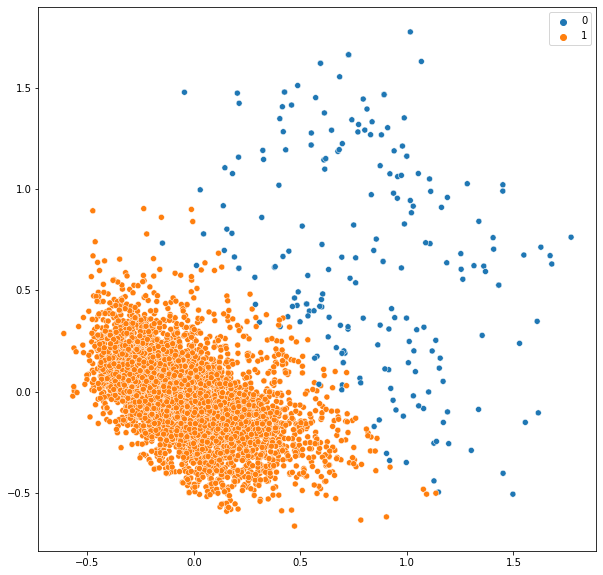

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_pca[:,0],
                y=X_pca[:,1],
                hue=km.labels_);

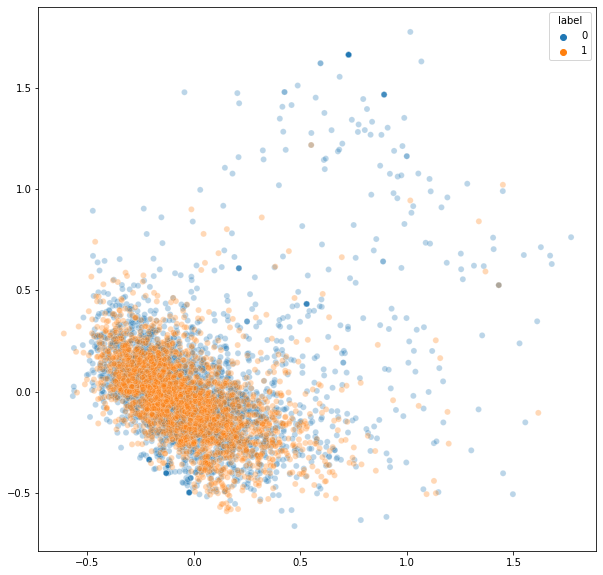

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_pca[:,0],
                y=X_pca[:,1],
                hue=sample_df.label,
                alpha=.3);

# Clustering on Tfidf Vectorized Text

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
vec = TfidfVectorizer( min_df=20,
                      ngram_range=(1,3)
                      )
X_vec = vec.fit_transform(sample_df['lemmatized_text'])

In [13]:
  km = KMeans(n_clusters=2,
              algorithm='full',
              random_state=99)

In [14]:
km.fit(X_vec)

KMeans(algorithm='full', n_clusters=2, random_state=99)

In [20]:
X_pca = PCA().fit_transform(X_vec.todense())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


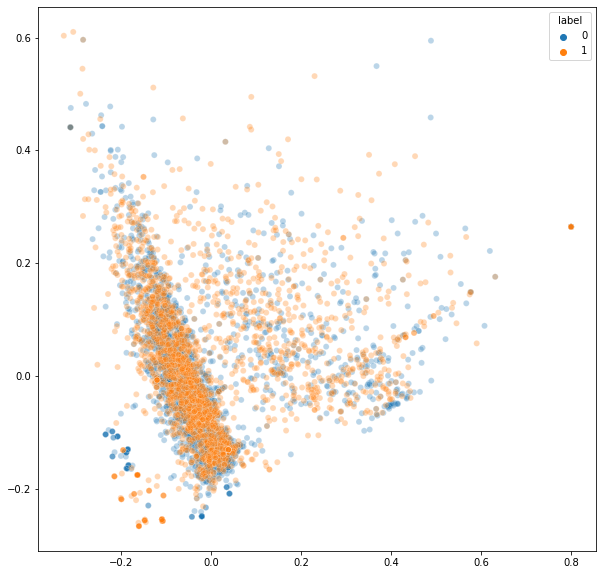

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_pca[:,0],
                y=X_pca[:,1],
                hue=sample_df.label,
                alpha=.3);

In [22]:
num_features = ['d_chall_score', 'aoa_mean',
       'aoa_min', 'aoa_max', 'conc_rating_mean', 'conc_rating_min',
       'conc_rating_max', 'num_lemmas']


In [34]:
si = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = si.fit_transform(sample_df[num_features])
X_num_std = StandardScaler().fit_transform(X_num)


In [57]:
metrics = find_best_kmeans(X_num_std,[2,3,4,5,6,7,8])

In [58]:
metrics

{'cluster': [2, 3, 4, 5, 6, 7, 8],
 'score': [0.578215750326415,
  0.5827496800305163,
  0.1915945984651341,
  0.22061948770636472,
  0.2286004387003079,
  0.20774957793808052,
  0.19839061540106112],
 'best_model': KMeans(n_clusters=2, random_state=99)}

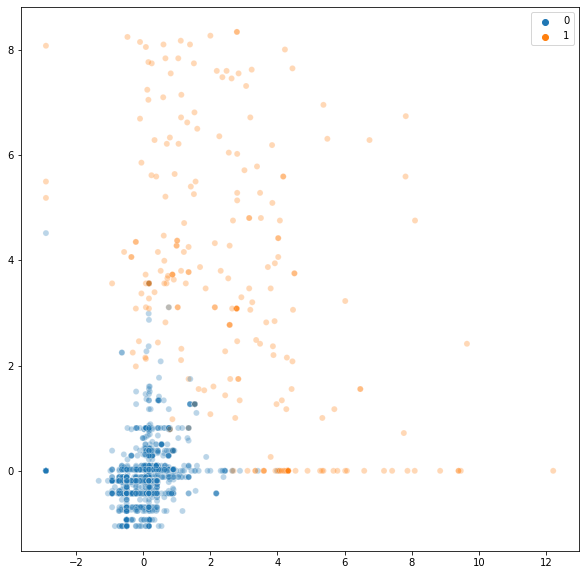

In [70]:
c_labels = metrics['best_model'].labels_
plot_clusters(X_num_std[:, 2], X_num_std[:,5], c_labels)

In [61]:
X_num_std.shape

(5000, 8)